Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 5, 10, 4, 10, 1, 3, 8, 5, 5, 3, 10, 4, 11, 3,…
$ Glucose                  <dbl> 116, 115, 110, 139, 103, 126, 99, 117, 109, 8…
$ BloodPressure            <dbl> 74, 0, 92, 80, 30, 88, 84, 92, 75, 58, 78, 60…
$ SkinThickness            <dbl> 0, 0, 0, 0, 38, 41, 0, 0, 26, 11, 31, 33, 0, …
$ Insulin                  <dbl> 0, 0, 0, 0, 83, 235, 0, 0, 0, 54, 0, 192, 0, …
$ BMI                      <dbl> 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 35.4, 34.…
$ DiabetesPedigreeFunction <dbl> 0.201, 0.134, 0.191, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 30, 29, 30, 57, 33, 27, 50, 38, 60, 22, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable `Outcome` would be suitable as the "outcome" in a logistic regression model. This variable represents whether or not a patient has diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test  |
| BMI         | Body mass index (weight in kg/(height in m)^2)  |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

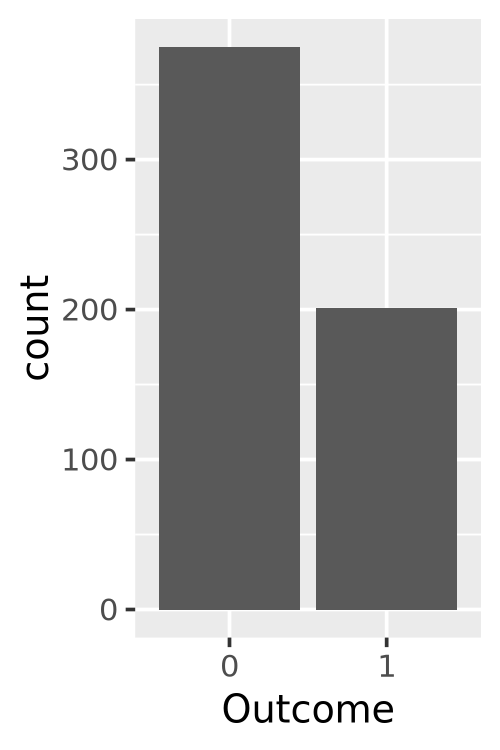

In [5]:
options(repr.plot.width = 2, repr.plot.height = 3)

ggplot(diabetes_train, aes(x = Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced, there are not equal counts of each outcome. There is a significantly greater amount of 0s than 1s.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

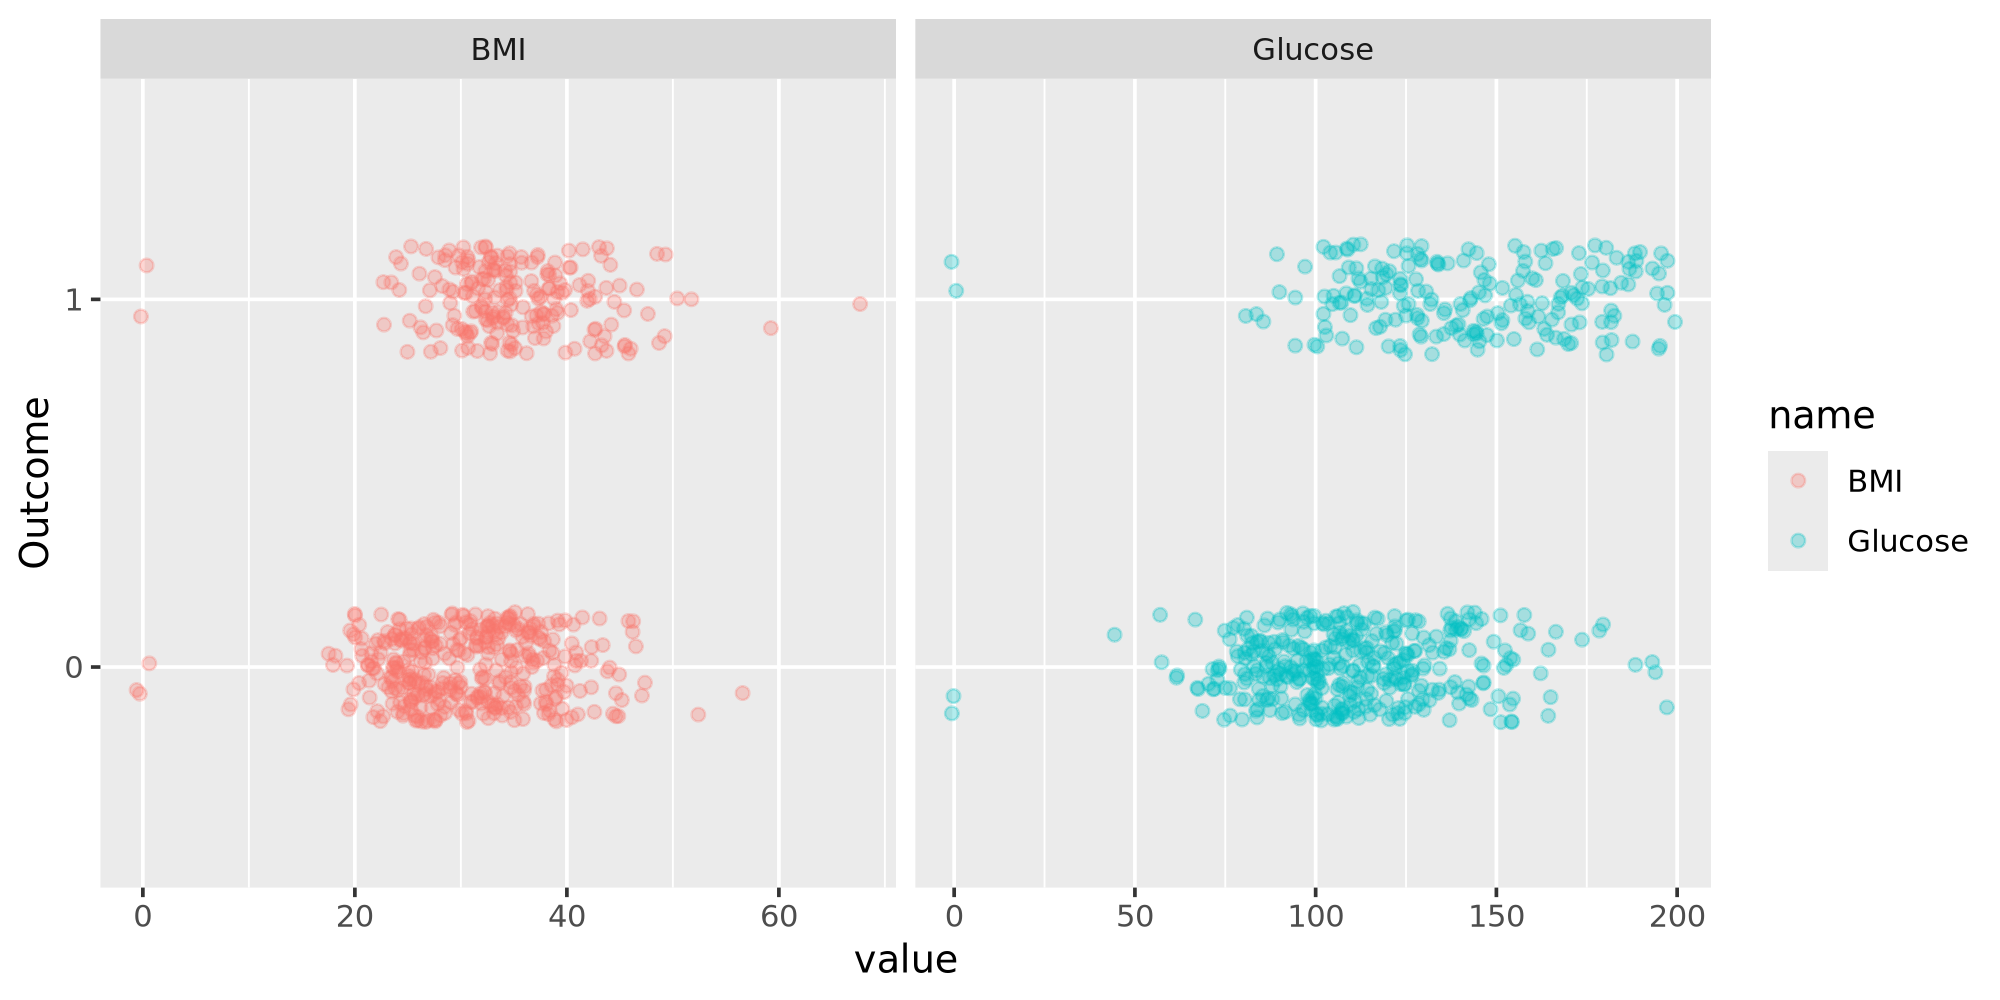

In [7]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(plot_df, aes(x = value, y = Outcome, color = name)) +
    geom_jitter(width = 0.75, height = 0.15, alpha = 0.3) +
    facet_wrap(~name, ncol = 2, scales = "free_x")

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When you remove the `scales = 'free_x'` argument from `facet_wrap()`, both subplots will share the same x-axis scale. Glucose and BMI will be plotted with the same x-axis scale, even though they may have varying ranges. By including this argument, the x-axis scale is allowed to vary across the subplots, while the y-axis scale remains the same.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.37809562,0.690929395,-10.678509,1.283163e-26
BMI,0.06796468,0.015462480,4.395458,1.105397e-05
Glucose,0.03615701,0.003827906,9.445637,3.532489e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)
diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4361615,0.56383852,6,148,72,35,0,33.6,0.627,50,1
0,0.9239235,0.07607655,1,85,66,29,0,26.6,0.351,31,0
0,0.9046776,0.09532238,1,89,66,23,94,28.1,0.167,21,0
0,0.9206304,0.07936957,3,78,50,32,88,31.0,0.248,26,1
0,0.8485732,0.15142679,7,100,0,0,0,30.0,0.484,32,1
0,0.8172074,0.18279258,7,107,74,0,0,29.6,0.254,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  31
         1  15  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- 67 individuals had diabetes in the dataset.
- Of those that actually had diabetes, 36 were predicted to have diabetes.
- 15 individuals were predicted to have diabetes, but did not have diabetes.